In [1]:
from pandas import read_csv, concat

from matplotlib import pyplot as plt

from os import listdir
from os.path import join

In [2]:
DATA_DIR = join("..", "data", "other")
print(f"All data are loaded from {DATA_DIR}")

All data are loaded from ..\data\other


In [13]:
def load_data_from_dir(dir_name, *args, **kwargs):
    """This function will load data from multiple csv files in a data dir.

    Besides dir_name, you can pass arguments and keyword arguments to
    the pandas.read_csv function, by adding them to this function's
    parameter list. The function will always return a pandas.DataFrame.
    To succeed, you need to make sure that the schema of all contained
    csv files is equal (i.e. all must have the same columns in the same
    order).

    The function will add an additional column to the pandas.DataFrame
    containing the name of the file, the respective row has been loaded
    from. The column is called "origin" (e.g. "1.csv")

    :param dir_name: The directory name to load from
    :return: pandas.DataFrame with data
    """
    first = True
    for file in listdir(dir_name):
        temp_file_path = join(dir_name, file)
        if first:
            data = read_csv(temp_file_path, *args, **kwargs)
            data["origin"] = str(temp_file_path)
        else:
            temp_data = read_csv(temp_file_path, *args, **kwargs)
            temp_data["origin"] = str(temp_file_path)
            data = concat([data, temp_data])
        first = False
    return data

## Load the Data

In [14]:
data = load_data_from_dir(
    # Original arguments
    dir_name=DATA_DIR,

    # Args for pandas.read_csv()
    sep=";",
    parse_dates=[0],
    index_col=0
)

## Explore loaded Data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14929 entries, 2020-03-01 15:44:06 to 2020-02-08 17:47:18
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accelerometer1RMS    14929 non-null  float64
 1   Accelerometer2RMS    14929 non-null  float64
 2   Current              14929 non-null  float64
 3   Pressure             14929 non-null  float64
 4   Temperature          14929 non-null  float64
 5   Thermocouple         14929 non-null  float64
 6   Voltage              14929 non-null  float64
 7   Volume Flow RateRMS  14929 non-null  float64
 8   anomaly              14929 non-null  float64
 9   changepoint          14929 non-null  float64
 10  origin               14929 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.4+ MB


In [6]:
x_colums = [
    "Accelerometer1RMS",
    "Accelerometer2RMS",
    "Current",
    "Pressure",
    "Temperature",
    "Thermocouple",
    "Voltage",
    "Volume Flow RateRMS"
]

y_colums = [
    "anomaly"
]

X = data[x_colums]
y = data[y_colums]

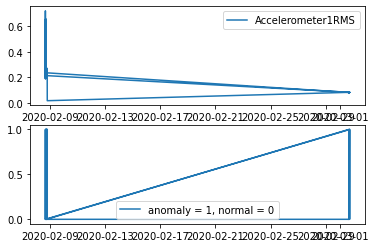

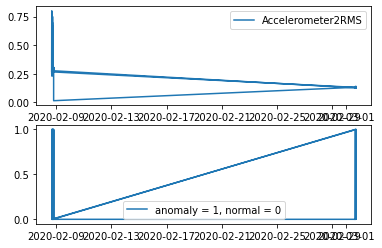

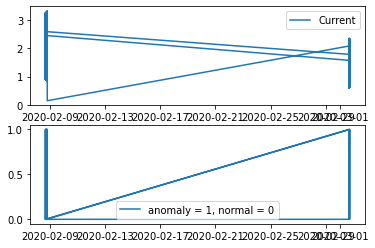

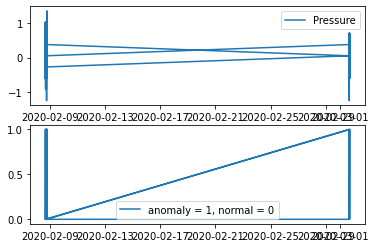

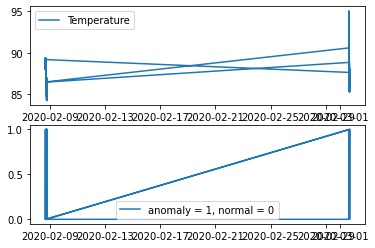

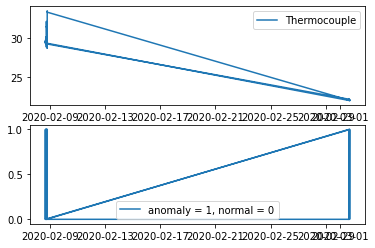

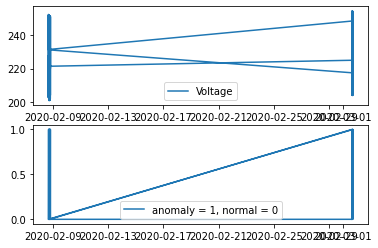

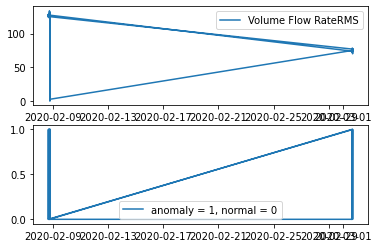

In [7]:
for column in X.columns:
    fig, ax = plt.subplots(ncols=1, nrows=2)
    ax[0].plot(X[column], label=column)
    ax[1].plot(y, label="anomaly = 1, normal = 0")
    ax[0].legend(loc=0)
    ax[1].legend(loc=0)
    plt.show()